In [1]:
from thangquang.bert_logistic import read_texts_from_dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/thangquang09/CODE/CTAI_MachineLearning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train"
test_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/test"
gt_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train.csv"
print("Loading data...")
df_train = read_texts_from_dir(train_path)
df_test = read_texts_from_dir(test_path)
df_train_gt = pd.read_csv(gt_path)
y_train = df_train_gt["real_text_id"].values
df_train['label'] = df_train_gt["real_text_id"]

Loading data...
Number of directories: 95
Number of directories: 1068


### EDA new

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import re

In [4]:
df_train['real_text'] = np.where(df_train['label'] == 1, df_train['file_1'], df_train['file_2'])
df_train['fake_text'] = np.where(df_train['label'] == 1, df_train['file_2'], df_train['file_1'])

print("Dữ liệu sau khi tái cấu trúc:")
print(df_train[['real_text', 'fake_text']].head())

Dữ liệu sau khi tái cấu trúc:
                                            real_text  \
id                                                      
0   The VIRSA (Visible Infrared Survey Telescope A...   
1   The project aims to achieve an accuracy level ...   
2   Scientists can learn about how galaxies form a...   
3   The importance for understanding how stars evo...   
4   Analyzing how fast stars rotate within a galax...   

                                            fake_text  
id                                                     
0   The China relay network has released a signifi...  
1   China\nThe goal of this project involves achie...  
2   Dinosaur eggshells offer clues about what dino...  
3   China\nThe study suggests that multiple star s...  
4   Dinosaur Rex was excited about his new toy set...  


In [5]:
df = df_train.copy()

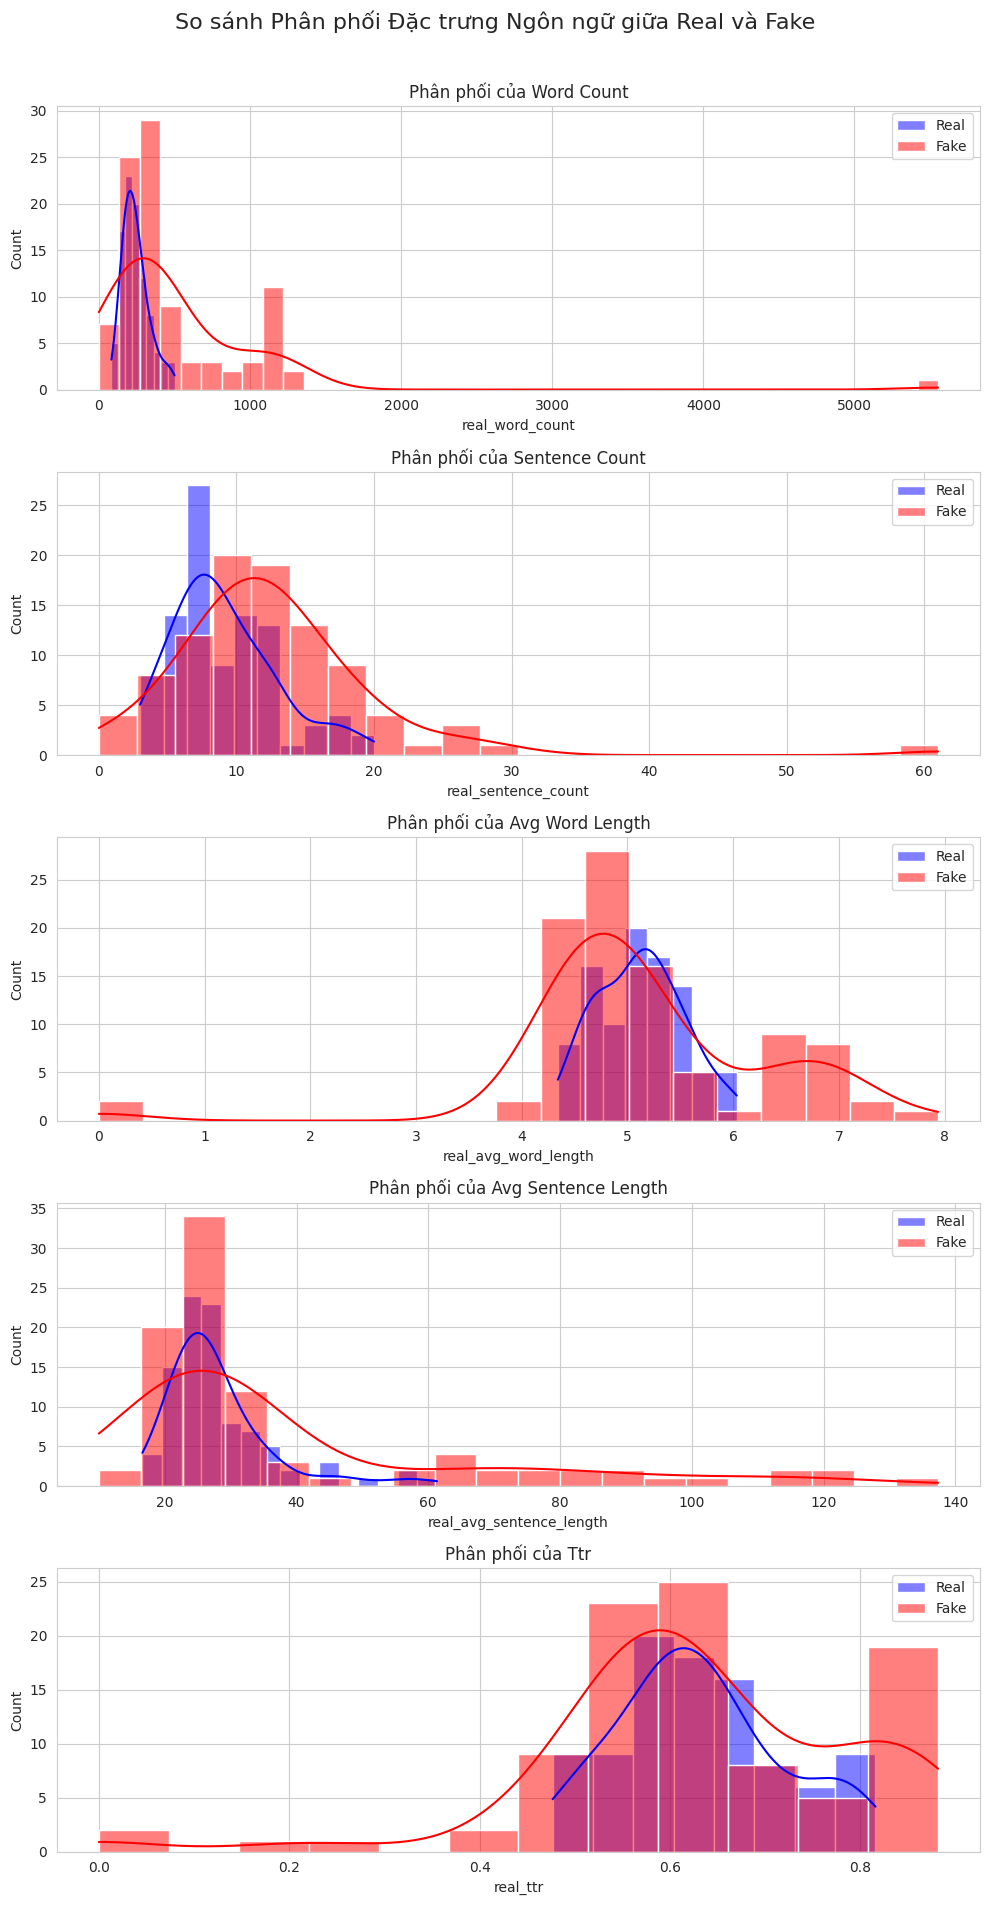

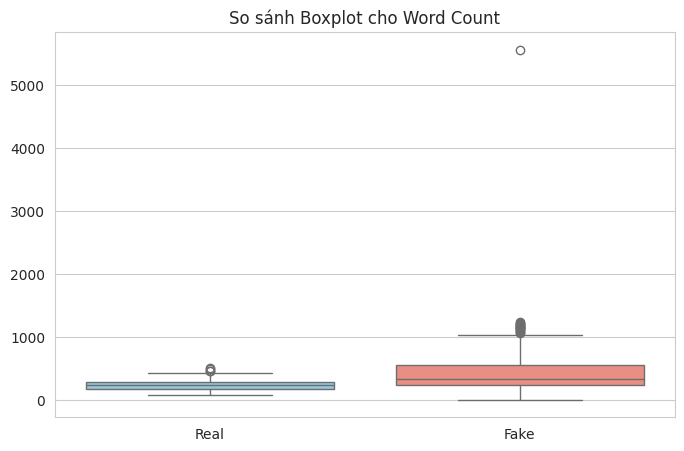

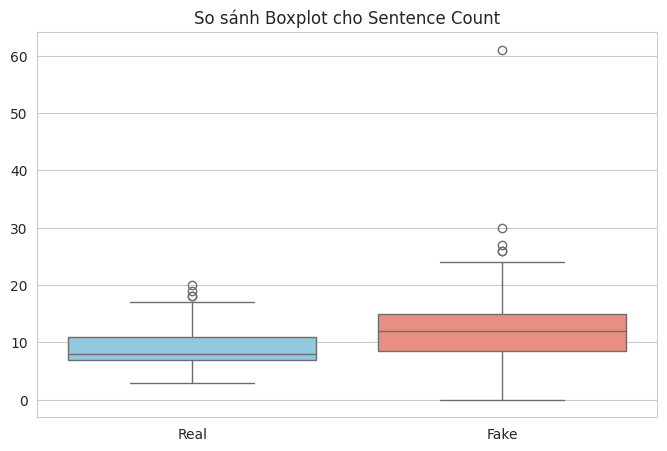

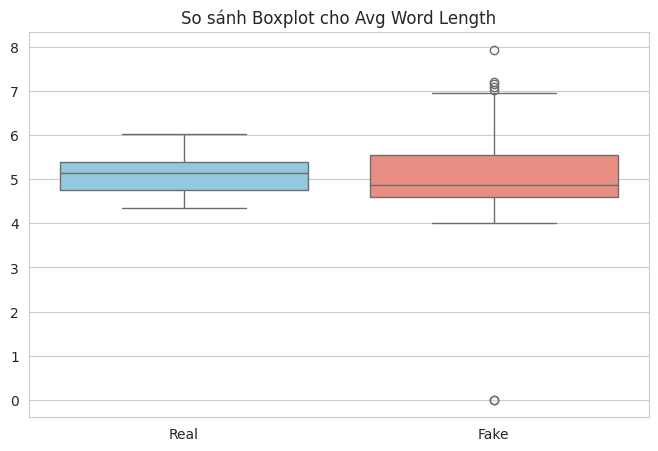

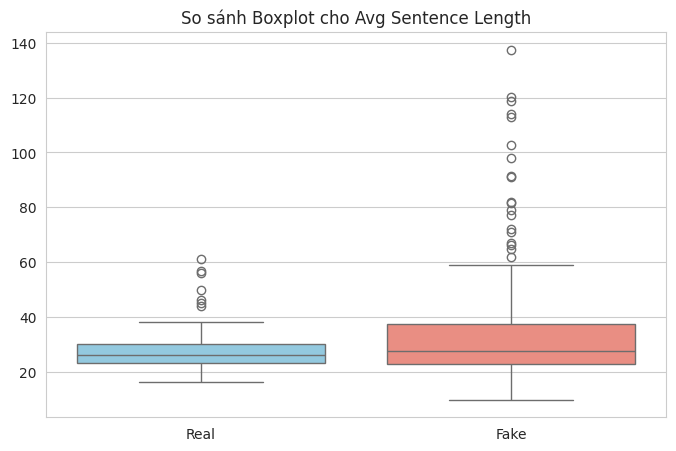

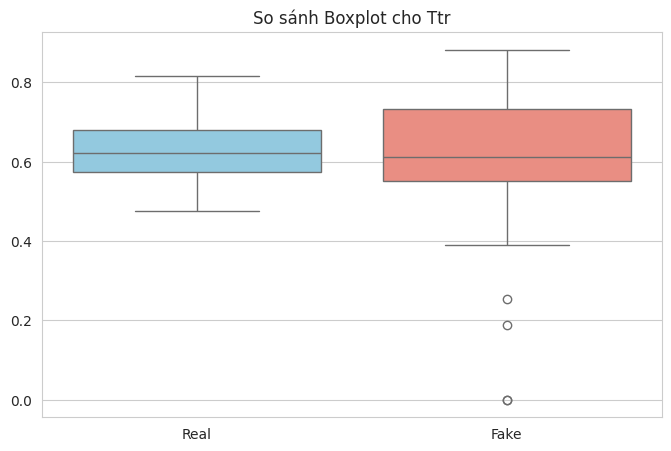

In [6]:
# --- Các hàm trợ giúp ---
def get_word_count(text):
    return len(nltk.word_tokenize(str(text)))

def get_sentence_count(text):
    return len(nltk.sent_tokenize(str(text)))

def get_avg_word_length(text):
    words = nltk.word_tokenize(str(text))
    if not words:
        return 0
    return sum(len(word) for word in words) / len(words)

def get_ttr(text):
    tokens = [word.lower() for word in nltk.word_tokenize(str(text))]
    if not tokens:
        return 0
    types = set(tokens)
    return len(types) / len(tokens)

# --- Tạo các feature mới ---
feature_funcs = {
    'word_count': get_word_count,
    'sentence_count': get_sentence_count,
    'avg_word_length': get_avg_word_length,
    'ttr': get_ttr
}

for name, func in feature_funcs.items():
    df[f'real_{name}'] = df['real_text'].apply(func)
    df[f'fake_{name}'] = df['fake_text'].apply(func)
    
# Thêm độ dài câu trung bình
df['real_avg_sentence_length'] = df['real_word_count'] / df['real_sentence_count']
df['fake_avg_sentence_length'] = df['fake_word_count'] / df['fake_sentence_count']

# --- Trực quan hóa ---
features_to_plot = ['word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'ttr']

sns.set_style("whitegrid")
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 20))
fig.suptitle('So sánh Phân phối Đặc trưng Ngôn ngữ giữa Real và Fake', fontsize=16)

for i, feature in enumerate(features_to_plot):
    sns.histplot(df[f'real_{feature}'], ax=axes[i], color='blue', label='Real', kde=True)
    sns.histplot(df[f'fake_{feature}'], ax=axes[i], color='red', label='Fake', kde=True)
    axes[i].set_title(f'Phân phối của {feature.replace("_", " ").title()}', fontsize=12)
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Boxplot để so sánh rõ hơn
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[df[f'real_{feature}'], df[f'fake_{feature}']], palette=['skyblue', 'salmon'])
    plt.xticks([0, 1], ['Real', 'Fake'])
    plt.title(f'So sánh Boxplot cho {feature.replace("_", " ").title()}')
    plt.show()

Top 15 Bigrams trong văn bản REAL:
[(('large', 'telescope'), 19), (('adaptive', 'optics'), 16), (('star', 'formation'), 15), (('angular', 'resolution'), 9), (('across', 'various'), 8), (('individual', 'stars'), 8), (('black', 'holes'), 8), (('lambda', 'r'), 8), (('distant', 'galaxies'), 7), (('across', 'different'), 7), (('extremely', 'large'), 7), (('et', 'al'), 7), (('light', 'curves'), 6), (('telescopes', 'like'), 6), (('european', 'extremely'), 6), (('black', 'hole'), 6), (('paranal', 'observatory'), 6), (('li', 'abundances'), 6), (('wavelength', 'range'), 5), (('binary', 'systems'), 5)]


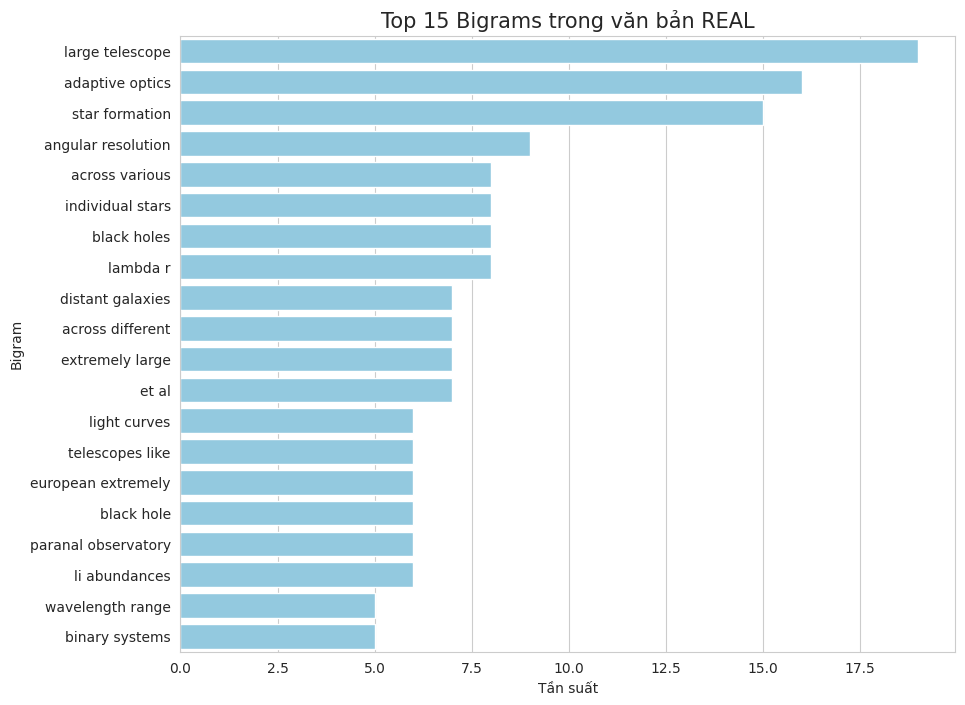


Top 15 Bigrams trong văn bản FAKE:
[(('resolvediaz', 'hen'), 19), (('inhibitory', 'penh'), 19), (('penh', 'eg'), 19), (('gar', 'violence'), 19), (('violence', 'relevcommunity'), 19), (('relevcommunity', 'sentiment'), 19), (('sentiment', 'arbitrowani'), 19), (('eks', 'empty'), 19), (('empty', 'zus'), 19), (('zus', 'republicanune'), 19), (('republicanune', 'togg'), 19), (('togg', 'legen'), 19), (('neugadastarting', 'src'), 19), (('template', 'upset'), 19), (('upset', 'casestl'), 19), (('casestl', 'spec'), 19), (('spec', 'recommend'), 19), (('plea', 'pok'), 19), (('pok', 'revel'), 19), (('newspaperities', 'tilby'), 19)]


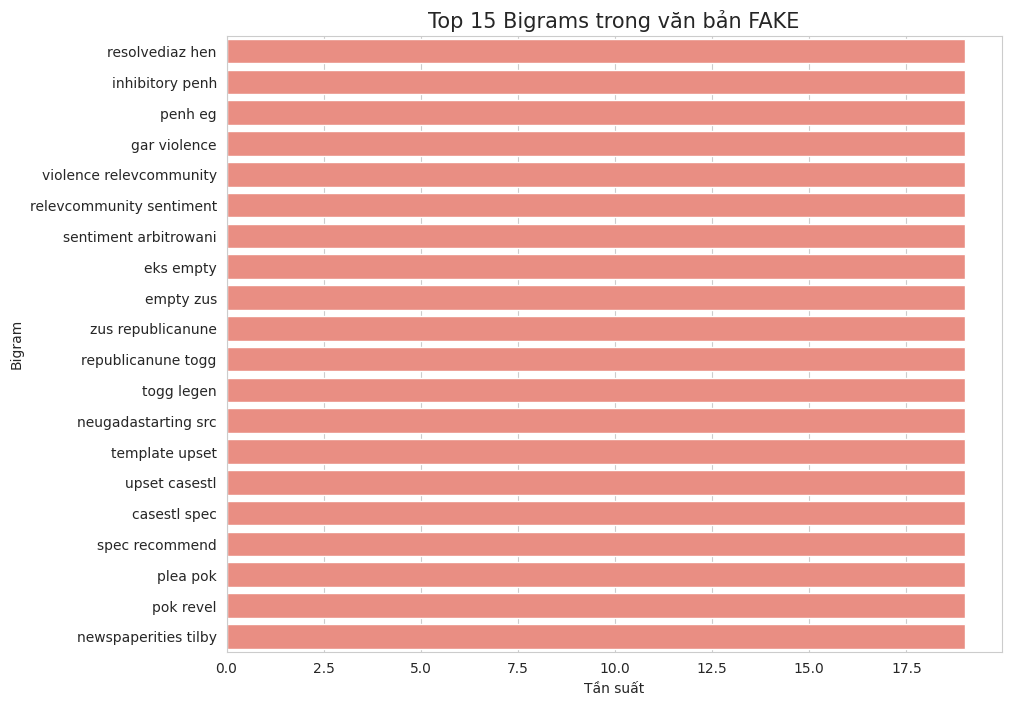

In [7]:
from nltk.corpus import stopwords
from nltk import bigrams

stop_words = set(stopwords.words('english'))

def get_top_ngrams(corpus, n=2, top_k=20):
    # Tiền xử lý: chuyển thành chữ thường, loại bỏ ký tự không phải chữ cái và stop words
    corpus = corpus.lower()
    corpus = re.sub(r'[^a-zA-Z\s]', '', corpus)
    tokens = [word for word in corpus.split() if word not in stop_words]
    
    # Tạo n-grams và đếm
    n_grams = bigrams(tokens)
    n_gram_counts = Counter(n_grams)
    
    return n_gram_counts.most_common(top_k)

# Gộp tất cả văn bản real và fake lại
real_corpus = ' '.join(df['real_text'].astype(str))
fake_corpus = ' '.join(df['fake_text'].astype(str))

# Lấy top bigrams
top_real_bigrams = get_top_ngrams(real_corpus, n=2, top_k=20)
top_fake_bigrams = get_top_ngrams(fake_corpus, n=2, top_k=20)

# --- Trực quan hóa top bigrams ---
def plot_top_ngrams(data, title, color):
    # Chuyển đổi dữ liệu để vẽ biểu đồ
    labels = [' '.join(gram) for gram, count in data]
    counts = [count for gram, count in data]
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=counts, y=labels, color=color)
    plt.title(title, fontsize=15)
    plt.xlabel('Tần suất')
    plt.ylabel('Bigram')
    plt.show()

print("Top 15 Bigrams trong văn bản REAL:")
print(top_real_bigrams)
plot_top_ngrams(top_real_bigrams, 'Top 15 Bigrams trong văn bản REAL', 'skyblue')

print("\nTop 15 Bigrams trong văn bản FAKE:")
print(top_fake_bigrams)
plot_top_ngrams(top_fake_bigrams, 'Top 15 Bigrams trong văn bản FAKE', 'salmon')

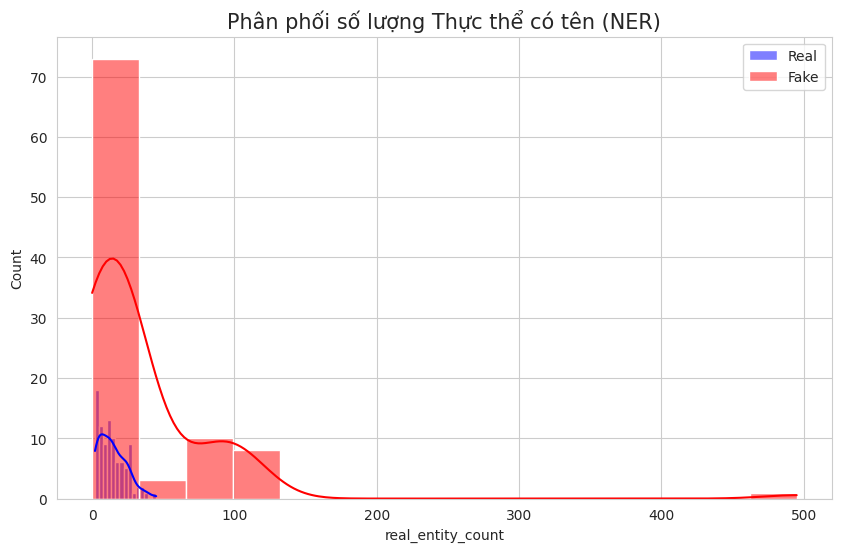

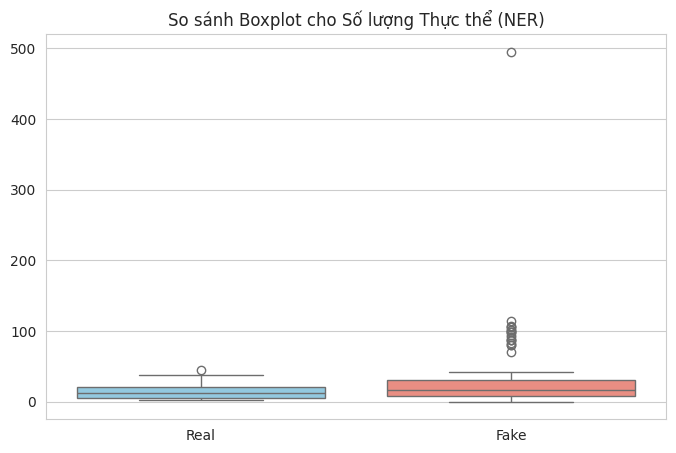

In [8]:
import spacy

# Tải mô hình spaCy (chỉ cần chạy một lần)
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Mô hình 'en_core_web_sm' chưa được tải. Vui lòng chạy:")
    print("python -m spacy download en_core_web_sm")
    nlp = None

if nlp:
    def count_entities(text):
        doc = nlp(str(text))
        return len(doc.ents)

    # Tạo feature số lượng thực thể
    df['real_entity_count'] = df['real_text'].apply(count_entities)
    df['fake_entity_count'] = df['fake_text'].apply(count_entities)

    # --- Trực quan hóa ---
    plt.figure(figsize=(10, 6))
    sns.histplot(df['real_entity_count'], color='blue', label='Real', kde=True, bins=15)
    sns.histplot(df['fake_entity_count'], color='red', label='Fake', kde=True, bins=15)
    plt.title('Phân phối số lượng Thực thể có tên (NER)', fontsize=15)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[df['real_entity_count'], df['fake_entity_count']], palette=['skyblue', 'salmon'])
    plt.xticks([0, 1], ['Real', 'Fake'])
    plt.title('So sánh Boxplot cho Số lượng Thực thể (NER)')
    plt.show()

In [9]:
df.describe().T[['mean', 'std', 'min', 'max']].round(2)

,mean,std,min,max
label,1.52,0.50,1.00,2.00
real_word_count,242.41,87.66,83.00,501.00
fake_word_count,513.77,629.20,0.00,5553.00
real_sentence_count,9.14,3.78,3.00,20.00
fake_sentence_count,12.58,7.66,0.00,61.00
real_avg_word_length,5.12,0.40,4.34,6.03
fake_avg_word_length,5.14,1.18,0.00,7.94
real_ttr,0.63,0.09,0.48,0.82
fake_ttr,0.63,0.17,0.00,0.88
real_avg_sentence_length,28.05,8.19,16.60,61.33


## Insight


1. Đặc trưng về độ dài (Word, Sentences Count)
   - Văn bản REAL có độ dài rất ổn định và tập trung vào một khoảng hẹp (từ 150 tới 400 từ, và 5 tới 15 câu). Phân phối gần như đối xứng.
   - Văn bản FAKE có phân phối cực kỳ lệch. Một nhóm rất lớn văn bản siêu ngắn và một nhóm nhỏ các văn bản siêu dài $\implies$ sự biến thiên rất lớn

2. Đặc trưng về Văn phong và nội dung (TTR và N-Grams)
   - TTR (độ đa dạng từ vựng): phân phối khá là tương đồng, nhưng văn bản FAKE có một số outliers với TTR rất thấp, cho thấy nó rất lặp lại từ ngữ.
   - N-Grams (Bigrams): 
     - REAL: Rất hợp lý và mang tính học thuật, có chủ đề `thiên văn học` ("large telescope", "star formation", "adaptive optics")
     - FAKE: Hoàn toàn vô nghĩa và kỳ lạ: "resolvediaz hen", "inhibitory penh", "empty zus"

3. Đặc trưng về thực thể NER
   - Văn bản REAL có số lượng thực thể ổn định hơn và trong khoảng hẹp
   - Văn bản FAKE có một số lượng lớn các bài **không có hoặc có rất ít thực thể**, nhưng đồng thời có những bài ảo giác ra **số lượng thực thể khổng lồ**

## Phân tích thêm

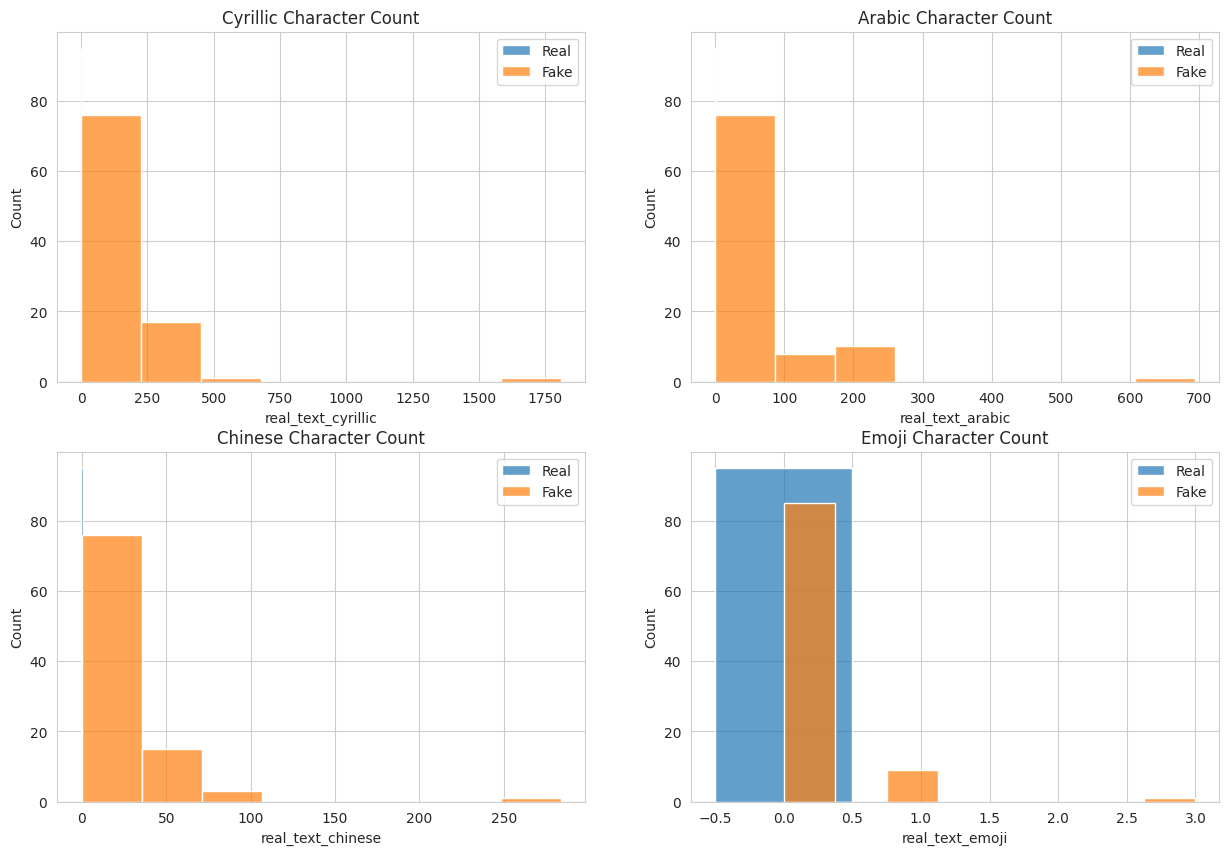

In [ ]:
def analyze_script_diversity(text):
    cyrillic_count = len(re.findall(r"[\u0400-\u04FF]", text))  # Russian
    arabic_count = len(re.findall(r"[\u0600-\u06FF]", text))   # Arabic
    chinese_count = len(re.findall(r"[\u4e00-\u9fff]", text))  # Chinese
    emoji_count = len(re.findall(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF]", text))
    return cyrillic_count, arabic_count, chinese_count, emoji_count

# Áp dụng cho cả real và fake text
for text_type in ['real_text', 'fake_text']:
    df[f'{text_type}_cyrillic'] = df[text_type].apply(lambda x: analyze_script_diversity(x)[0])
    df[f'{text_type}_arabic'] = df[text_type].apply(lambda x: analyze_script_diversity(x)[1])
    df[f'{text_type}_chinese'] = df[text_type].apply(lambda x: analyze_script_diversity(x)[2])
    df[f'{text_type}_emoji'] = df[text_type].apply(lambda x: analyze_script_diversity(x)[3])

# Visualize script diversity
plt.figure(figsize=(15, 10))
script_features = ['cyrillic', 'arabic', 'chinese', 'emoji']
for i, feature in enumerate(script_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[f'real_text_{feature}'], label='Real', alpha=0.7)
    sns.histplot(df[f'fake_text_{feature}'], label='Fake', alpha=0.7)
    plt.title(f'{feature.title()} Character Count')
    plt.legend()

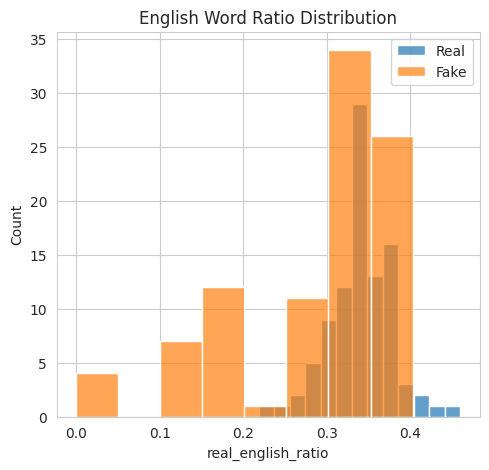

In [14]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 42

def calculate_english_ratio(text):
    if not isinstance(text, str) or not text.strip():
        return 0.0
    words = text.split()
    if not words:
        return 0.0
    english_count = 0
    for word in words:
        try:
            if detect(word) == 'en':
                english_count += 1
        except LangDetectException:
            continue
    return english_count / len(words)

# Áp dụng và visualize
df['real_english_ratio'] = df['real_text'].apply(calculate_english_ratio)
df['fake_english_ratio'] = df['fake_text'].apply(calculate_english_ratio)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['real_english_ratio'], label='Real', alpha=0.7)
sns.histplot(df['fake_english_ratio'], label='Fake', alpha=0.7)
plt.title('English Word Ratio Distribution')
plt.legend()

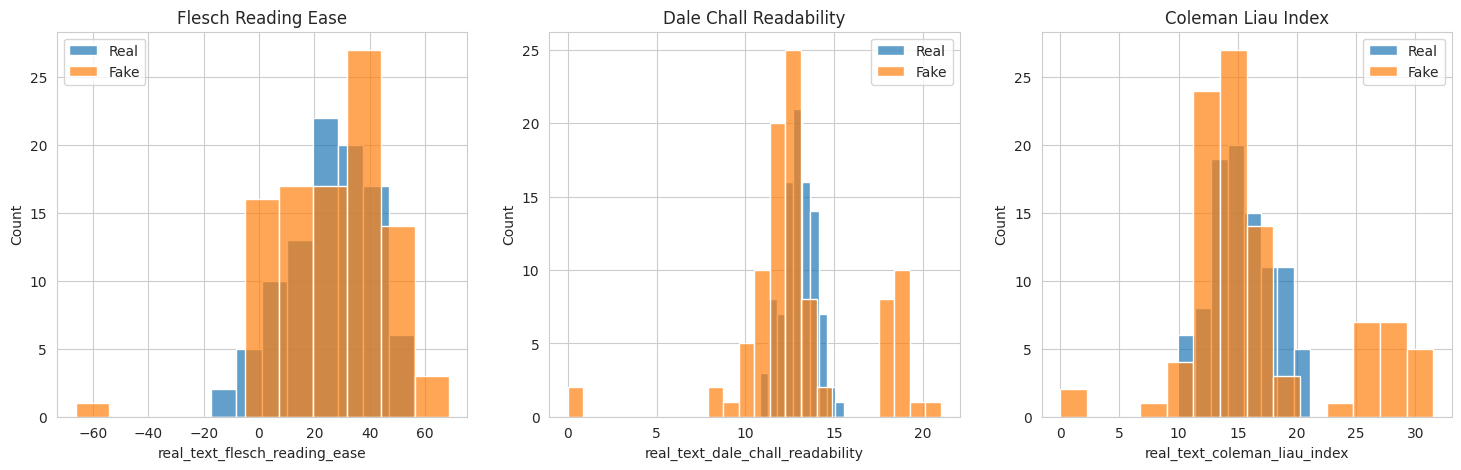

In [15]:
import textstat

def compute_readability_features(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'dale_chall_readability': textstat.dale_chall_readability_score(text),
        'coleman_liau_index': textstat.coleman_liau_index(text)
    }

# Tính toán cho cả real và fake
for text_type in ['real_text', 'fake_text']:
    readability_features = df[text_type].apply(compute_readability_features)
    for feature in ['flesch_reading_ease', 'dale_chall_readability', 'coleman_liau_index']:
        df[f'{text_type}_{feature}'] = readability_features.apply(lambda x: x[feature])

# Visualize - Đây là features quan trọng nhất theo importance chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
readability_features = ['flesch_reading_ease', 'dale_chall_readability', 'coleman_liau_index']
for i, feature in enumerate(readability_features):
    sns.histplot(df[f'real_text_{feature}'], ax=axes[i], label='Real', alpha=0.7)
    sns.histplot(df[f'fake_text_{feature}'], ax=axes[i], label='Fake', alpha=0.7)
    axes[i].set_title(f'{feature.replace("_", " ").title()}')
    axes[i].legend()

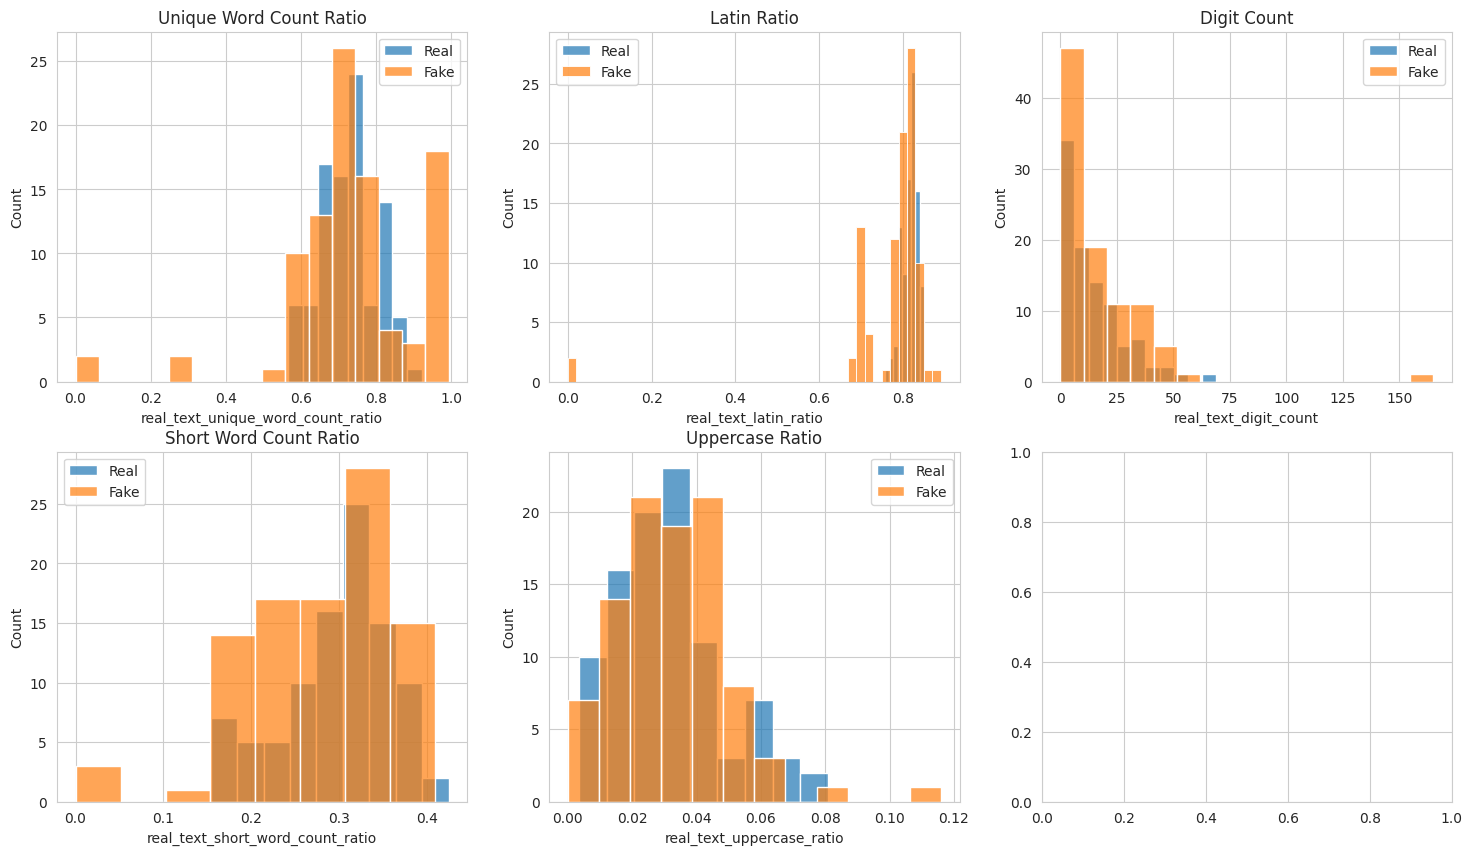

In [16]:
def compute_top_importance_features(text):
    words = text.split()
    word_count = len(words)
    unique_words = len(set(words))
    char_count = len(text)
    
    return {
        'unique_word_count_ratio': unique_words / max(word_count, 1),
        'latin_ratio': len(re.findall(r'[a-zA-Z]', text)) / max(char_count, 1),
        'digit_count': len(re.findall(r'\d', text)),
        'short_word_count_ratio': len([w for w in words if len(w) <= 3]) / max(word_count, 1),
        'uppercase_ratio': len(re.findall(r'[A-Z]', text)) / max(char_count, 1)
    }

# Tính toán top features
for text_type in ['real_text', 'fake_text']:
    top_features = df[text_type].apply(compute_top_importance_features)
    for feature in ['unique_word_count_ratio', 'latin_ratio', 'digit_count', 
                   'short_word_count_ratio', 'uppercase_ratio']:
        df[f'{text_type}_{feature}'] = top_features.apply(lambda x: x[feature])

# Visualize top importance features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
top_features = ['unique_word_count_ratio', 'latin_ratio', 'digit_count', 
               'short_word_count_ratio', 'uppercase_ratio']

for i, feature in enumerate(top_features):
    sns.histplot(df[f'real_text_{feature}'], ax=axes[i], label='Real', alpha=0.7)
    sns.histplot(df[f'fake_text_{feature}'], ax=axes[i], label='Fake', alpha=0.7)
    axes[i].set_title(f'{feature.replace("_", " ").title()}')
    axes[i].legend()

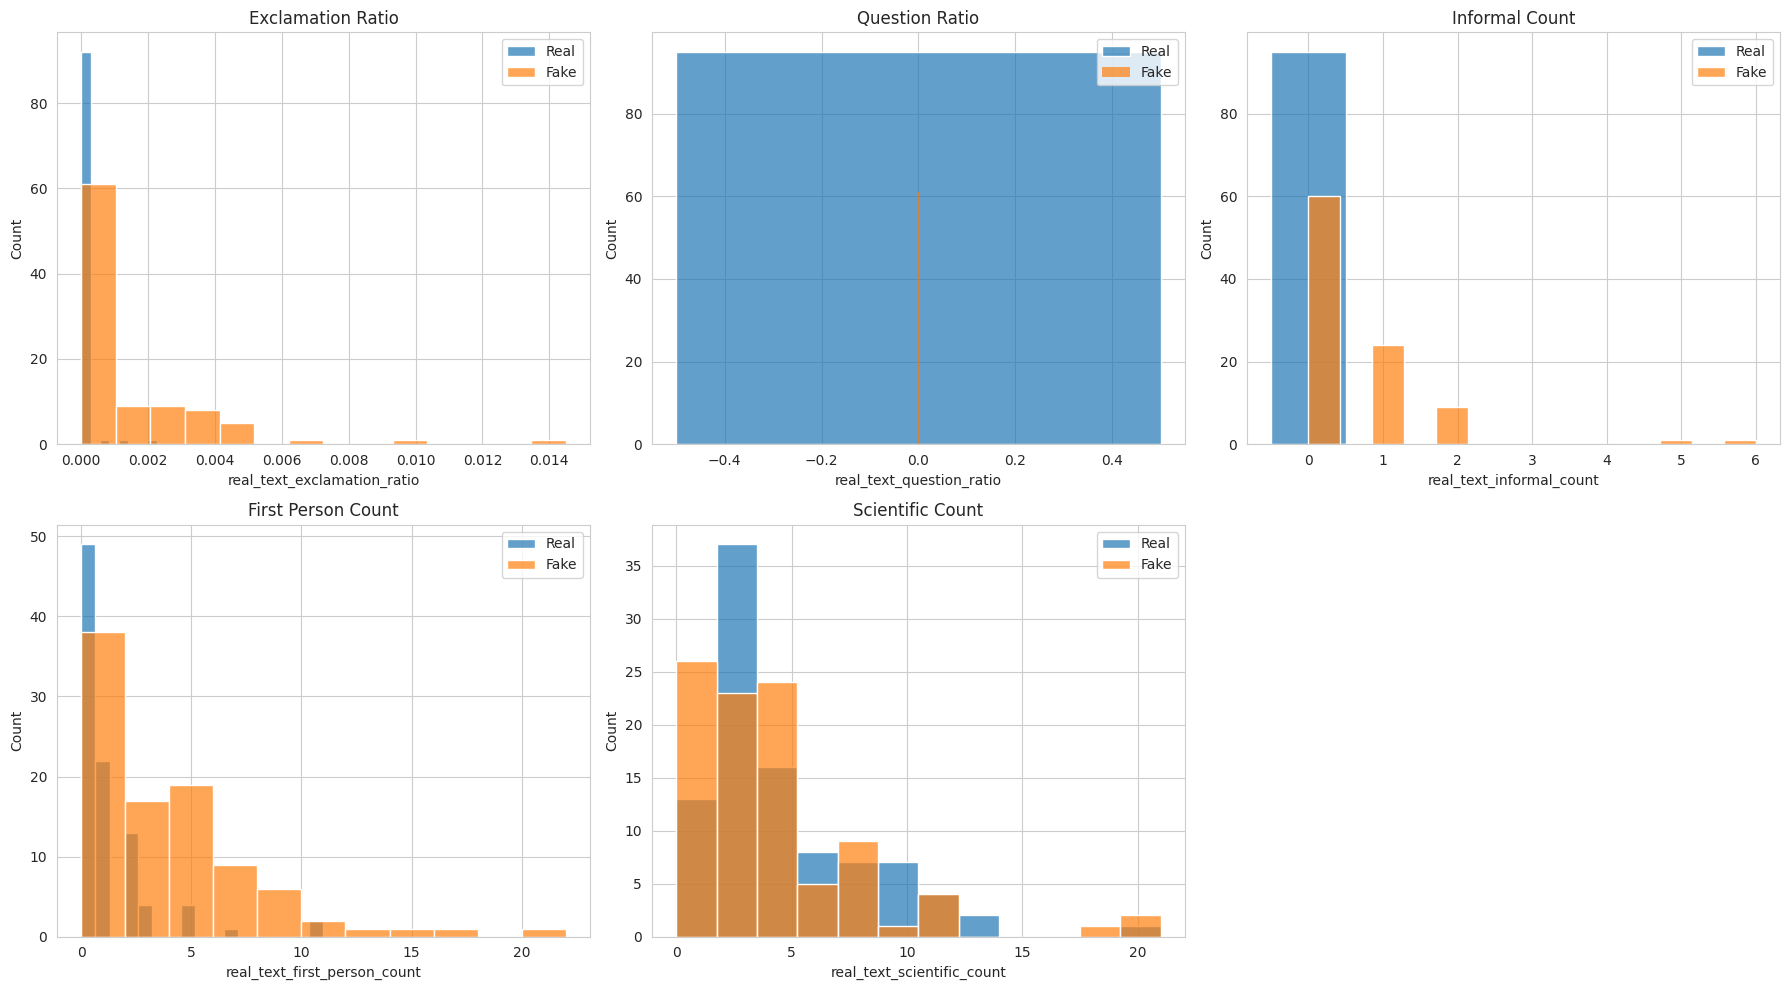

In [ ]:
#!TODO: Tổng quát hóa lên thay vì chi tiết

def analyze_storytelling_patterns(text):
    char_count = len(text)
    return {
        'exclamation_ratio': text.count("!") / max(char_count, 1),
        'question_ratio': text.count("?") / max(char_count, 1),
        'informal_count': sum(text.lower().count(word) for word in 
                             ["forget", "wow", "amazing", "incredible", "magic", "unicorn"]),
        'bold_count': text.count("**") + text.count("__"),
        'first_person_count': len(re.findall(r"\b(I|we|our|my|mine)\b", text, re.I)),
        'scientific_count': sum(text.lower().count(term) for term in 
                               ["observation", "analysis", "telescope", "data", "measurement", "survey"])
    }

# Visualize storytelling patterns
storytelling_features = ['exclamation_ratio', 'question_ratio', 'informal_count', 
                        'first_person_count', 'scientific_count']
# Apply storytelling pattern features to both text types
for text_type in ['real_text', 'fake_text']:
    storytelling_features_result = df[text_type].apply(analyze_storytelling_patterns)
    for feature in storytelling_features:
        df[f'{text_type}_{feature}'] = storytelling_features_result.apply(lambda x: x[feature])

# Visualize storytelling patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(storytelling_features):
    sns.histplot(df[f'real_text_{feature}'], ax=axes[i], label='Real', alpha=0.7)
    sns.histplot(df[f'fake_text_{feature}'], ax=axes[i], label='Fake', alpha=0.7)
    axes[i].set_title(f'{feature.replace("_", " ").title()}')
    axes[i].legend()

# Hide the last empty subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

def find_discriminative_words(real_texts, fake_texts, top_k=50):
    """Tự động tìm từ phân biệt giữa real và fake"""
    
    # Tạo corpus và labels
    all_texts = real_texts + fake_texts
    labels = ['real'] * len(real_texts) + ['fake'] * len(fake_texts)
    
    # TF-IDF
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', 
                                lowercase=True, ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(all_texts)
    feature_names = vectorizer.get_feature_names_out()
    
    # Tính điểm trung bình cho mỗi nhóm
    real_indices = [i for i, label in enumerate(labels) if label == 'real']
    fake_indices = [i for i, label in enumerate(labels) if label == 'fake']
    
    real_scores = tfidf_matrix[real_indices].mean(axis=0).A1
    fake_scores = tfidf_matrix[fake_indices].mean(axis=0).A1
    
    # Tìm từ đặc trưng cho mỗi nhóm
    score_diff = real_scores - fake_scores
    
    # Top từ của real text
    real_words_idx = score_diff.argsort()[-top_k:][::-1]
    real_distinctive_words = [feature_names[i] for i in real_words_idx]
    
    # Top từ của fake text  
    fake_words_idx = score_diff.argsort()[:top_k]
    fake_distinctive_words = [feature_names[i] for i in fake_words_idx]
    
    return real_distinctive_words, fake_distinctive_words

# Sử dụng
real_texts_list = df['real_text'].tolist()
fake_texts_list = df['fake_text'].tolist()

scientific_words, informal_words = find_discriminative_words(real_texts_list, fake_texts_list)

print("Top scientific/real words:", scientific_words[:20])
print("Top informal/fake words:", informal_words[:20])

def analyze_storytelling_patterns_tfidf(text):
    char_count = len(text)
    
    return {
        'exclamation_ratio': text.count("!") / max(char_count, 1),
        'question_ratio': text.count("?") / max(char_count, 1),
        'informal_count': sum(text.lower().count(word) for word in informal_words[:10]),
        'bold_count': text.count("**") + text.count("__"),
        'first_person_count': len(re.findall(r"\b(I|we|our|my|mine)\b", text, re.I)),
        'scientific_count': sum(text.lower().count(term) for term in scientific_words[:10])
    }

Top scientific/real words: ['stars', 'initial', 'observations', 'study', 'high', 'galaxies', 'including', 'systems', 'observing', 'expected', 'fe', 'disc', 'components', 'various', 'galaxy', 'large', 'star', 'telescope', 'based', 'sub']
Top informal/fake words: ['dinosaur', 'dinosaurs', 'think', 'space', 'just', 'secrets', 'cosmos', 'cosmic', 'powerful', 'earth', 'exploration', 'agency', 'like', 'universe', 'step', 'unique', 'work', 'encu', 'true', 'etwas']


In [ ]:
def analyze_storytelling_patterns_comprehensive(text):
    char_count = len(text)
    words = text.split()
    word_count = len(words)
    
    # === AUTOMATED TF-IDF FEATURES ===
    scientific_count = sum(text.lower().count(term) for term in scientific_words[:10])
    informal_count = sum(text.lower().count(word) for word in informal_words[:10])
    
    # === LINGUISTIC PATTERNS (Tổng quát hơn) ===
    # Sentiment analysis
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    
    # Readability
    import textstat
    flesch_score = textstat.flesch_reading_ease(text)
    complexity_score = textstat.dale_chall_readability_score(text)
    
    # Vocabulary diversity
    unique_words = len(set(word.lower() for word in words))
    lexical_diversity = unique_words / max(word_count, 1)
    
    # === GARBAGE TEXT DETECTION ===
    # Detect nonsensical patterns
    garbage_indicators = detect_garbage_patterns(text)
    
    # === STRUCTURAL PATTERNS ===
    exclamation_ratio = text.count("!") / max(char_count, 1)
    question_ratio = text.count("?") / max(char_count, 1)
    first_person_count = len(re.findall(r"\b(I|we|our|my|mine)\b", text, re.I))
    
    return {
        # TF-IDF based
        'scientific_count': scientific_count,
        'informal_count': informal_count,
        
        # Sentiment & Subjectivity
        'sentiment_compound': sentiment_scores['compound'],
        'sentiment_positive': sentiment_scores['pos'],
        'subjectivity_proxy': exclamation_ratio + question_ratio,  # Proxy for subjectivity
        
        # Readability
        'flesch_readability': flesch_score,
        'complexity_score': complexity_score,
        'lexical_diversity': lexical_diversity,
        
        # Garbage detection
        'garbage_score': garbage_indicators,
        
        # Structural
        'exclamation_ratio': exclamation_ratio,
        'question_ratio': question_ratio,
        'first_person_count': first_person_count
    }

def detect_garbage_patterns(text):
    """Detect nonsensical/garbage text patterns"""
    words = text.split()
    if not words:
        return 0
    
    garbage_score = 0
    
    # 1. Very short "words" that make no sense
    nonsense_words = len([w for w in words if len(w) <= 2 and w.isalpha()])
    garbage_score += nonsense_words / len(words)
    
    # 2. Words with unusual character combinations
    weird_patterns = 0
    for word in words:
        if len(word) > 3:
            # Too many consonants in a row
            if re.search(r'[bcdfghjklmnpqrstvwxyz]{4,}', word.lower()):
                weird_patterns += 1
            # Unusual character combinations
            if re.search(r'[qxz]{2,}|[bcdfghjklmnpqrstvwxyz]{5,}', word.lower()):
                weird_patterns += 1
    
    garbage_score += weird_patterns / len(words)
    
    # 3. Non-English character ratio
    non_english_chars = len(re.findall(r'[^\x00-\x7F]', text))
    garbage_score += non_english_chars / max(len(text), 1)
    
    return min(garbage_score, 1.0)  # Cap at 1.0

Text(0.5, 1.0, 'Jaccard Similarity by Label')

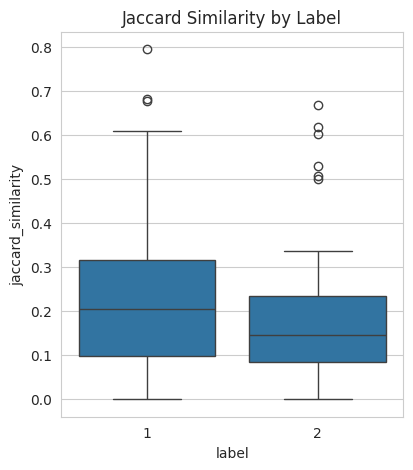

In [18]:
# Phân tích độ tương đồng giữa file_1 và file_2
def compute_pairwise_features(row):
    text1, text2 = row['file_1'], row['file_2']
    
    # Jaccard similarity
    words1 = set(text1.lower().split())
    words2 = set(text2.lower().split())
    jaccard_sim = len(words1 & words2) / max(len(words1 | words2), 1)
    
    # Length difference
    len_diff = abs(len(text1) - len(text2))
    word_diff = abs(len(text1.split()) - len(text2.split()))
    
    return pd.Series({
        'jaccard_similarity': jaccard_sim,
        'length_difference': len_diff,
        'word_count_difference': word_diff
    })

pairwise_features = df.apply(compute_pairwise_features, axis=1)
df = pd.concat([df, pairwise_features], axis=1)

# Visualize relationship with labels
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='label', y='jaccard_similarity', data=df)
plt.title('Jaccard Similarity by Label')

Text(0.5, 0, 'Absolute Correlation')

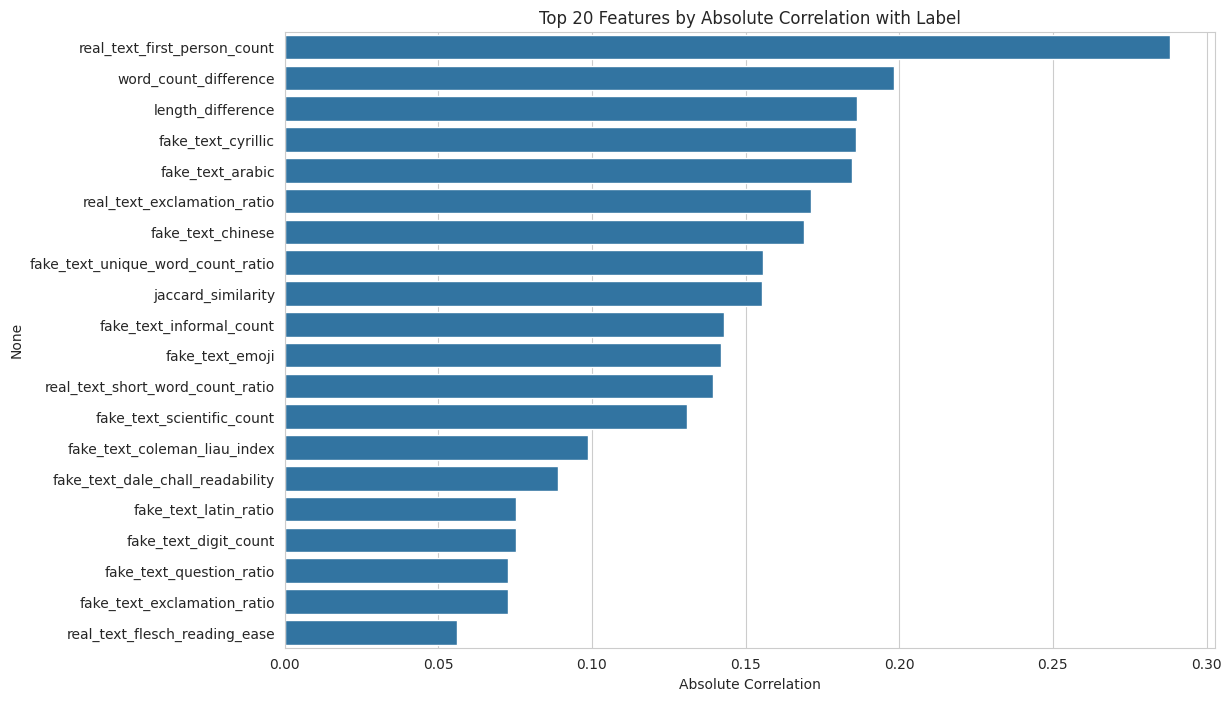

In [19]:
# Tính correlation của tất cả features với label
feature_cols = [col for col in df.columns if any(prefix in col for prefix in 
               ['real_text_', 'fake_text_', 'jaccard_', 'length_', 'word_count_'])]

correlations = df[feature_cols + ['label']].corr()['label'].abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.values[1:21], y=correlations.index[1:21])  # Top 20
plt.title('Top 20 Features by Absolute Correlation with Label')
plt.xlabel('Absolute Correlation')

### Tìm ra Rule-Based

In [10]:
train_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train"
test_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/test"
gt_path = "/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train.csv"
print("Loading data...")
df_train = read_texts_from_dir(train_path)
df_test = read_texts_from_dir(test_path)
df_train_gt = pd.read_csv(gt_path)
y_train = df_train_gt["real_text_id"].values

df_train['label'] = df_train_gt["real_text_id"]

df = df_train.copy()

Loading data...
Number of directories: 95
Number of directories: 1068


In [11]:
df['real_text'] = np.where(df['label'] == 1, df['file_1'], df['file_2'])
df['fake_text'] = np.where(df['label'] == 1, df['file_2'], df['file_1'])


def get_word_count(text): return len(str(text).split())
def get_sentence_count(text): return len(nltk.sent_tokenize(str(text)))
def count_entities(text):
    if not nlp: return 0
    doc = nlp(str(text))
    return len(doc.ents)

# Tạo DataFrame chứa các feature của văn bản REAL
df_real_features = pd.DataFrame({
    'word_count': df['real_text'].apply(get_word_count),
    'sentence_count': df['real_text'].apply(get_sentence_count),
    'ner_count': df['real_text'].apply(count_entities),
    'label': 'Real'
})

# Tạo DataFrame chứa các feature của văn bản FAKE
df_fake_features = pd.DataFrame({
    'word_count': df['fake_text'].apply(get_word_count),
    'sentence_count': df['fake_text'].apply(get_sentence_count),
    'ner_count': df['fake_text'].apply(count_entities),
    'label': 'Fake'
})

# Gộp lại thành một DataFrame duy nhất để huấn luyện các Decision Stump
df_for_stumps = pd.concat([df_real_features, df_fake_features], ignore_index=True)
y_stump = df_for_stumps['label']
print("--- Dữ liệu đã được chuẩn bị để tìm ngưỡng ---")
print(df_for_stumps.head())
print("...")

--- Dữ liệu đã được chuẩn bị để tìm ngưỡng ---
   word_count  sentence_count  ner_count label
0         304               9         19  Real
1         137               4          5  Real
2         159               3          3  Real
3         262               6          4  Real
4         123               4          2  Real
...


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_text


features_to_find_rules = ['word_count', 'sentence_count', 'ner_count']
optimal_thresholds = {}

print("\nBắt đầu tìm ngưỡng tối ưu cho từng feature...\n")

for feature in features_to_find_rules:
    X_feature = df_for_stumps[[feature]]
    
    stump_model = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump_model.fit(X_feature, y_stump)
    
    # Trích xuất ngưỡng và quy tắc
    threshold = stump_model.tree_.threshold[0]
    optimal_thresholds[feature] = round(threshold, 2)
    rule_text = export_text(stump_model, feature_names=[feature])
    
    print(f"--- Quy tắc cho '{feature}' ---")
    print(rule_text)
    print(f"===> Ngưỡng tối ưu tìm được: {optimal_thresholds[feature]}\n")




Bắt đầu tìm ngưỡng tối ưu cho từng feature...

--- Quy tắc cho 'word_count' ---
|--- word_count <= 412.00
|   |--- class: Real
|--- word_count >  412.00
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 412.0

--- Quy tắc cho 'sentence_count' ---
|--- sentence_count <= 10.50
|   |--- class: Real
|--- sentence_count >  10.50
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 10.5

--- Quy tắc cho 'ner_count' ---
|--- ner_count <= 58.00
|   |--- class: Real
|--- ner_count >  58.00
|   |--- class: Fake

===> Ngưỡng tối ưu tìm được: 58.0

